# Subspace Digital Twin, Parameter Selection Under Uncertainty

*BlockScience, April 2024*

Here we execute the PSUU framework for the subspace economic model. 

For more information see the methodology document by Danilo: https://hackmd.io/iFeP7NemRH--KtWbPP_W0w?view

## Part 1. Architecture Overview

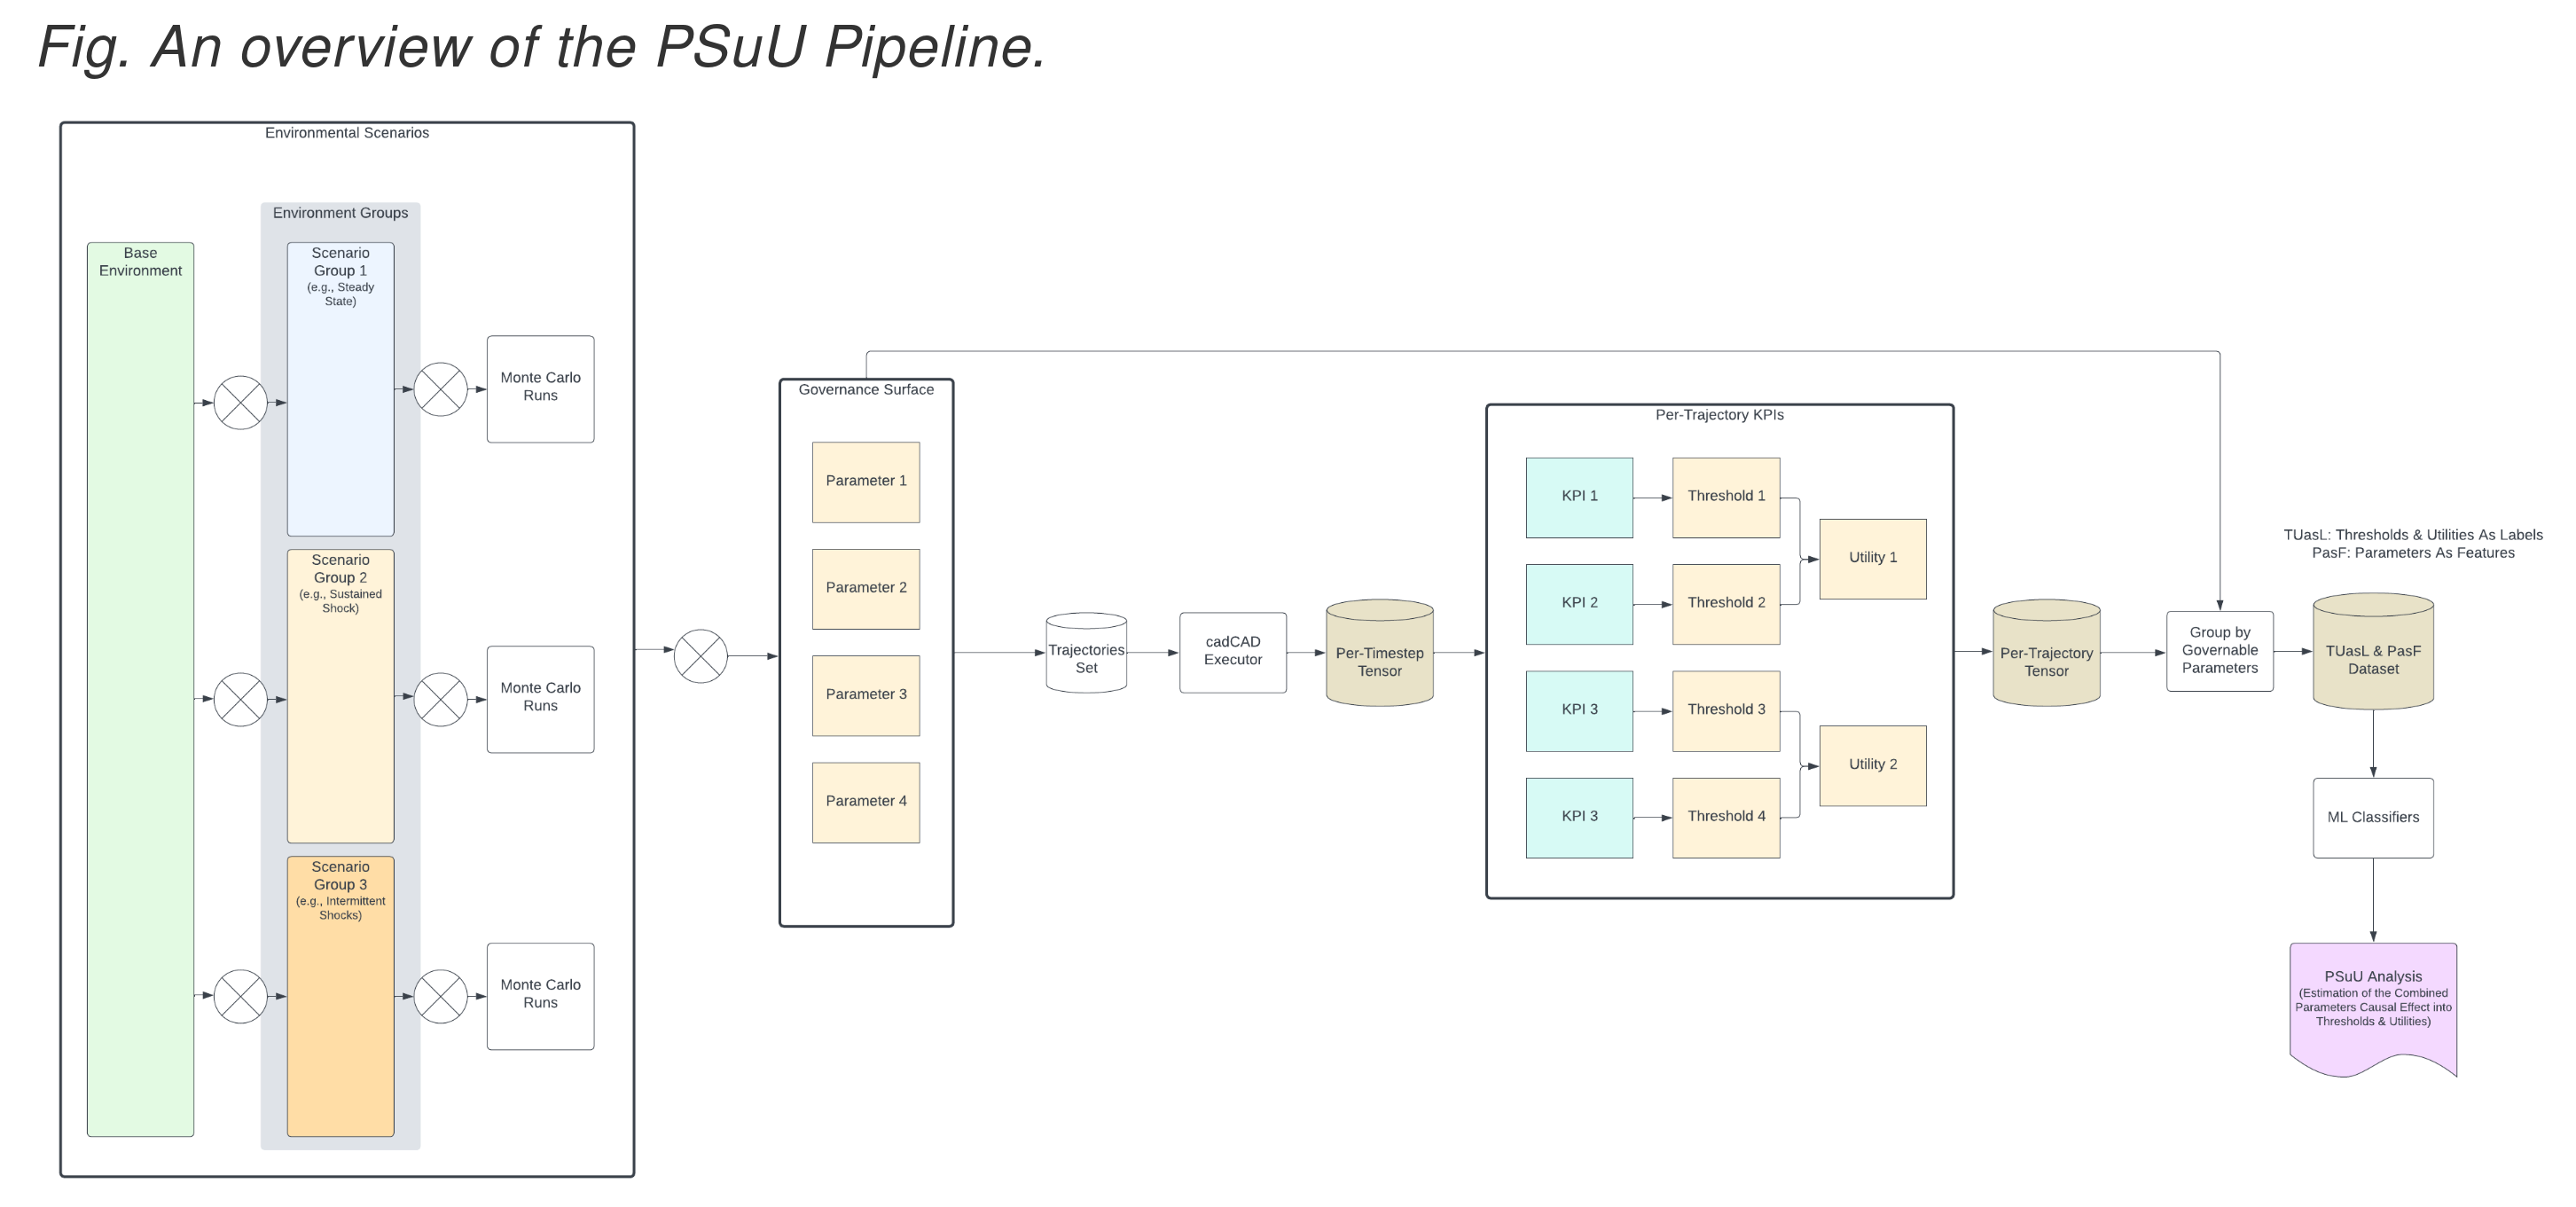

## Part 2. Loading and Cleaning the Per-Timestep Tensor

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import sys
sys.path.append('../../')

from glob import glob

latest = sorted(glob("../../data/simulations/psuu-2024*"))[-1]

sim_df = pd.read_pickle(latest, compression='gzip')


from subspace_model.psuu import timestep_tensor_to_trajectory_tensor, GOVERNANCE_SURFACE_PARAMS
agg_df = timestep_tensor_to_trajectory_tensor(sim_df).reset_index()

In [2]:
agg_df.set_index(GOVERNANCE_SURFACE_PARAMS).describe()

,simulation,subset,run,mean_relative_community_owned_supply,mean_farmer_subsidy_factor,mean_proposing_rewards_per_newly_pledged_space,mean_proposer_reward_minus_voter_reward,cumm_rewards_before_1yr,abs_sum_storage_fees_per_sum_compute_fees,cumm_rewards
count,200.0,200.000000,200.000000,200.000000,0.0,200.0,200.0,200.000000,200.0,200.000000
mean,0.0,99.500000,10.500000,1.154211,NaN,0.0,0.0,24450.399562,0.0,24450.399562
std,0.0,57.879185,5.780751,0.000002,NaN,0.0,0.0,14570.857846,0.0,14570.857846
min,0.0,0.000000,1.000000,1.154208,NaN,0.0,0.0,8637.881367,0.0,8637.881367
25%,0.0,49.750000,5.750000,1.154208,NaN,0.0,0.0,8643.970191,0.0,8643.970191
50%,0.0,99.500000,10.500000,1.154211,NaN,0.0,0.0,25917.846888,0.0,25917.846888
75%,0.0,149.250000,15.250000,1.154213,NaN,0.0,0.0,43188.575505,0.0,43188.575505
max,0.0,199.000000,20.000000,1.154213,NaN,0.0,0.0,43206.575492,0.0,43206.575492


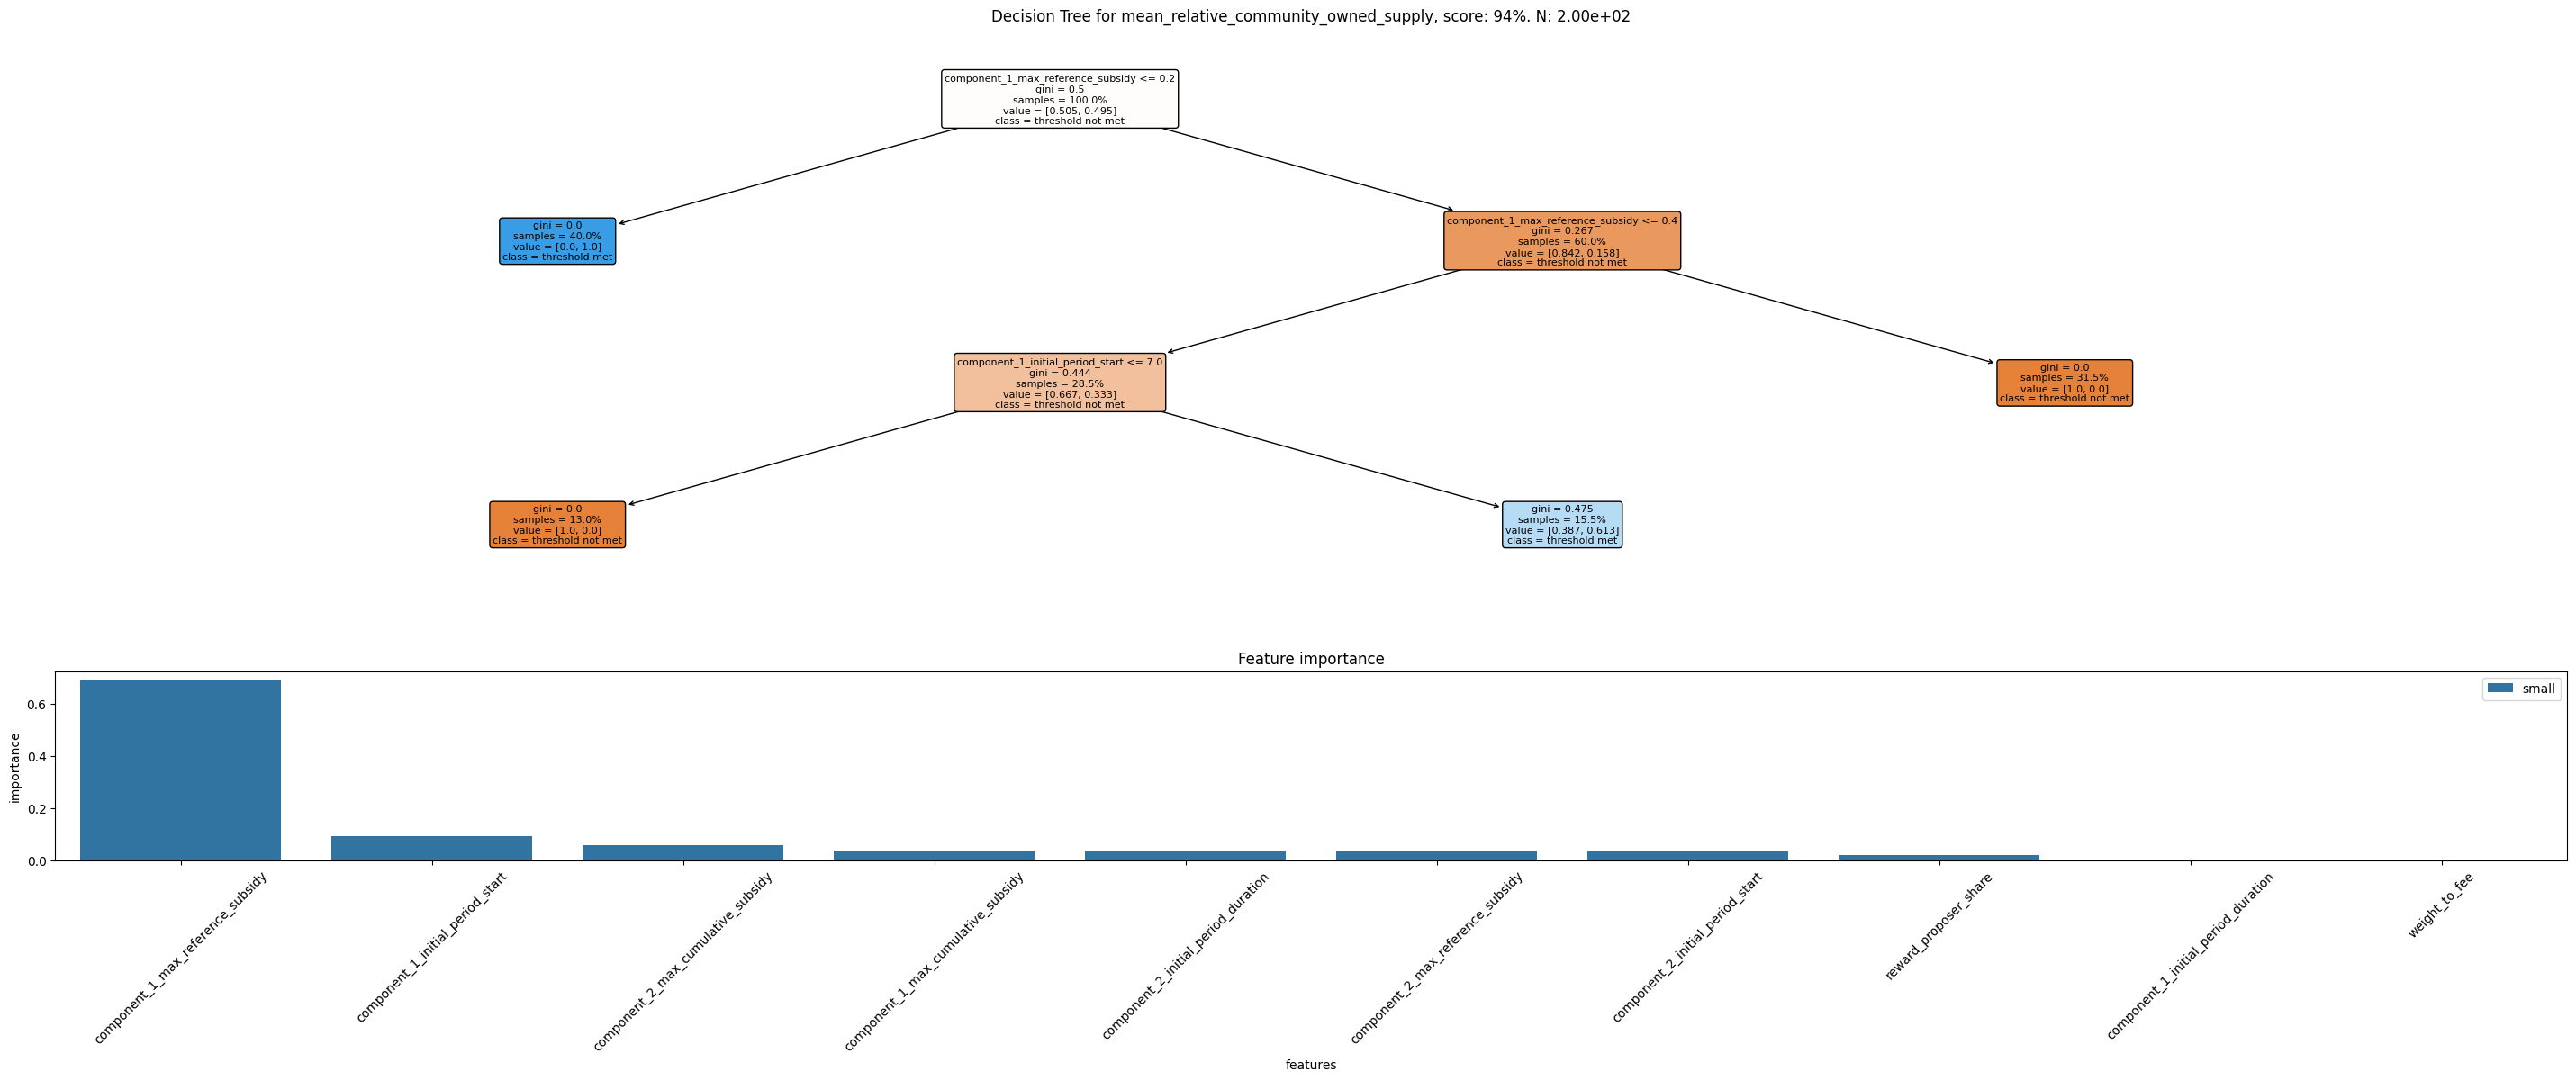

/Users/danlessa/repos/bsci/subspace/env/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


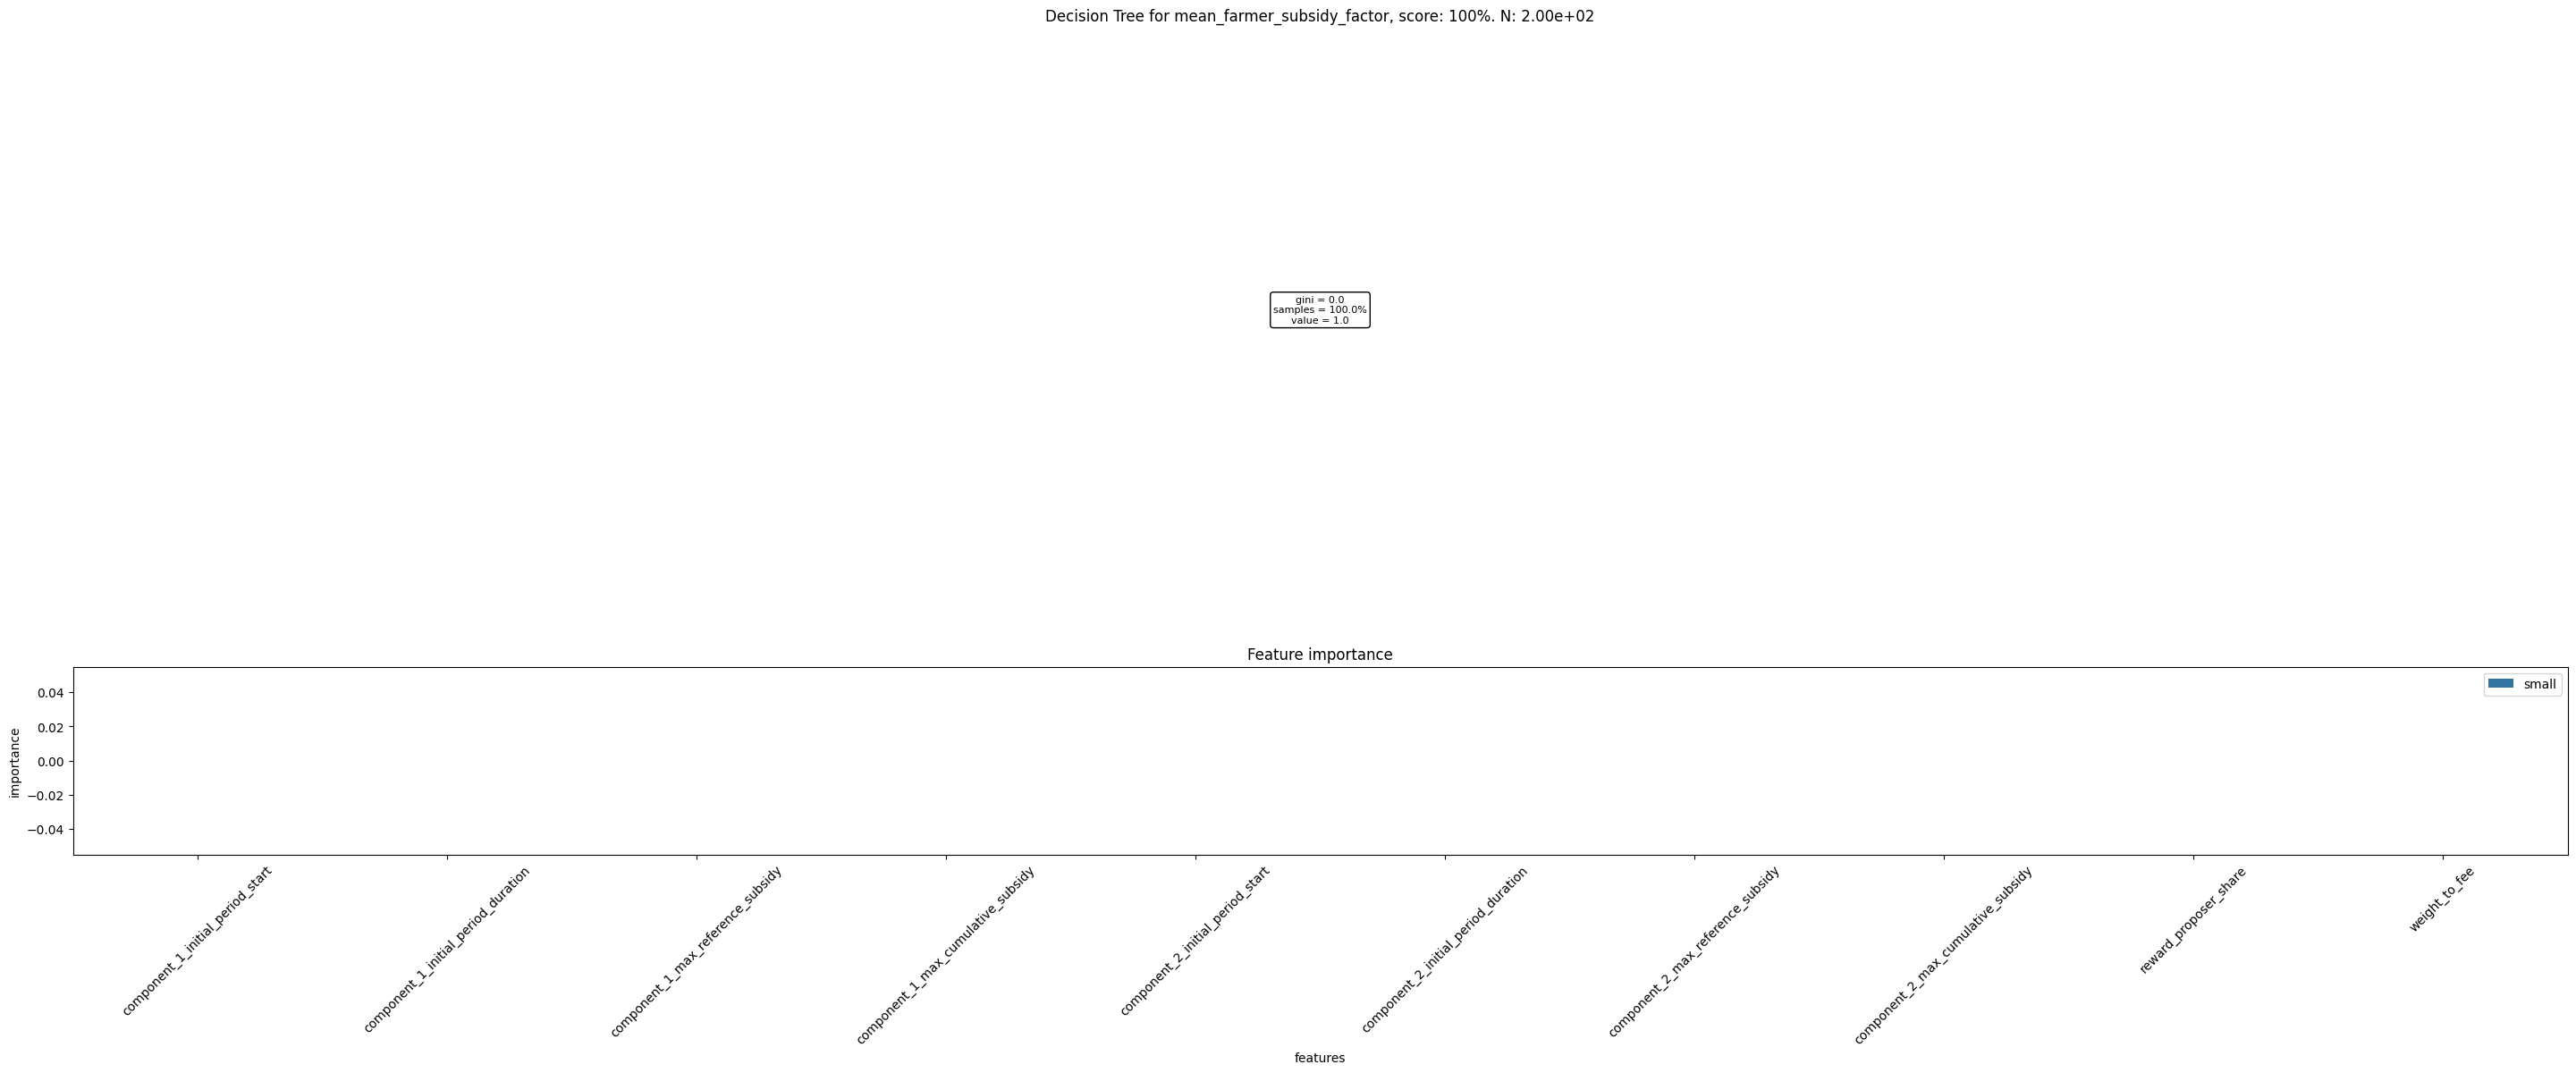

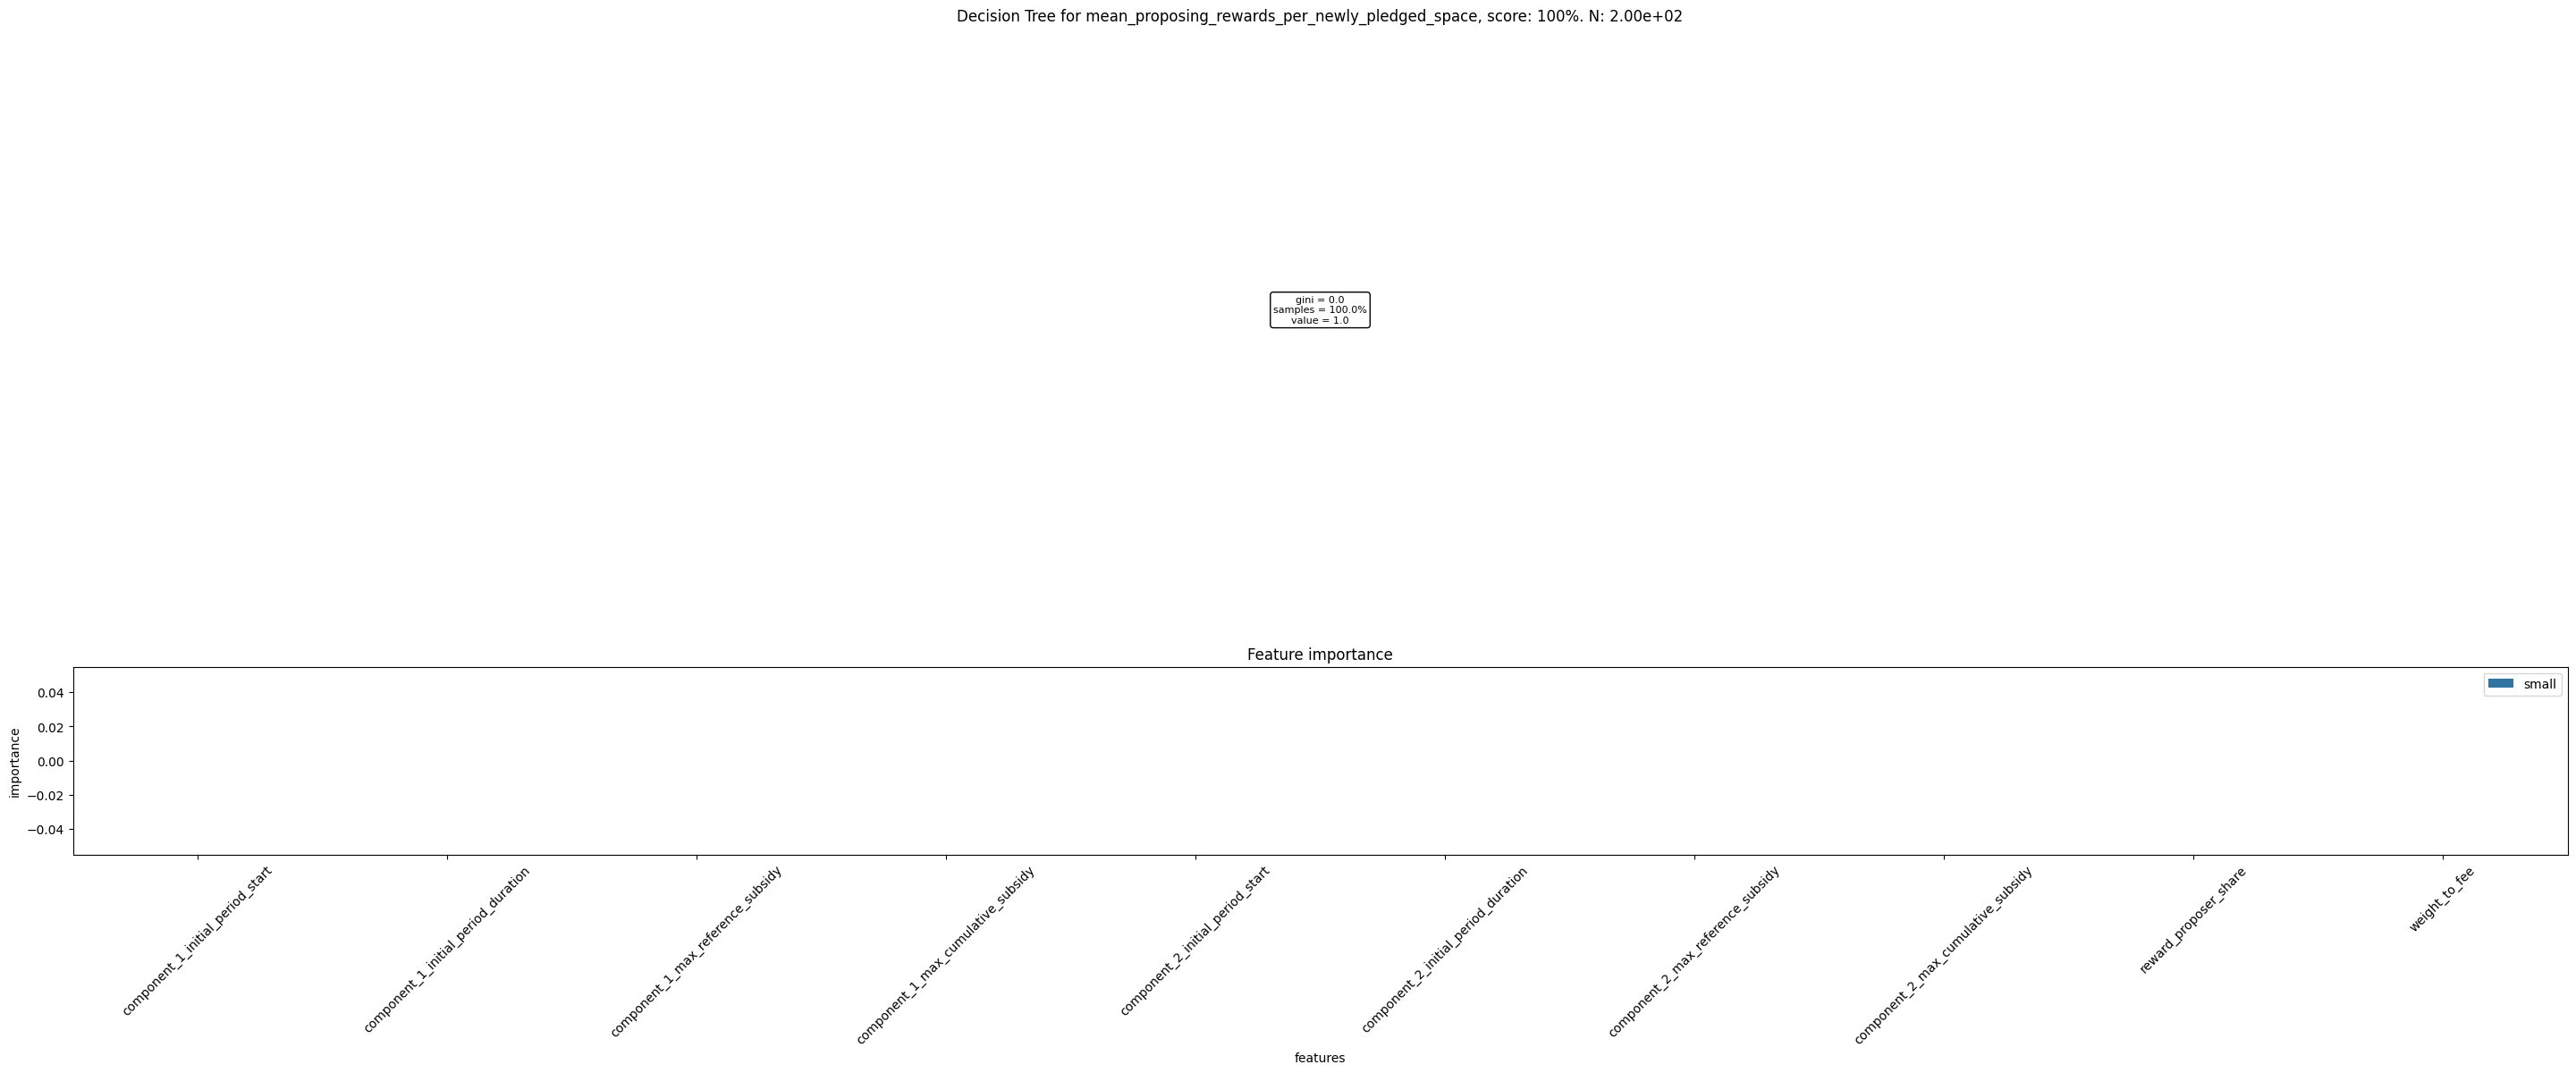

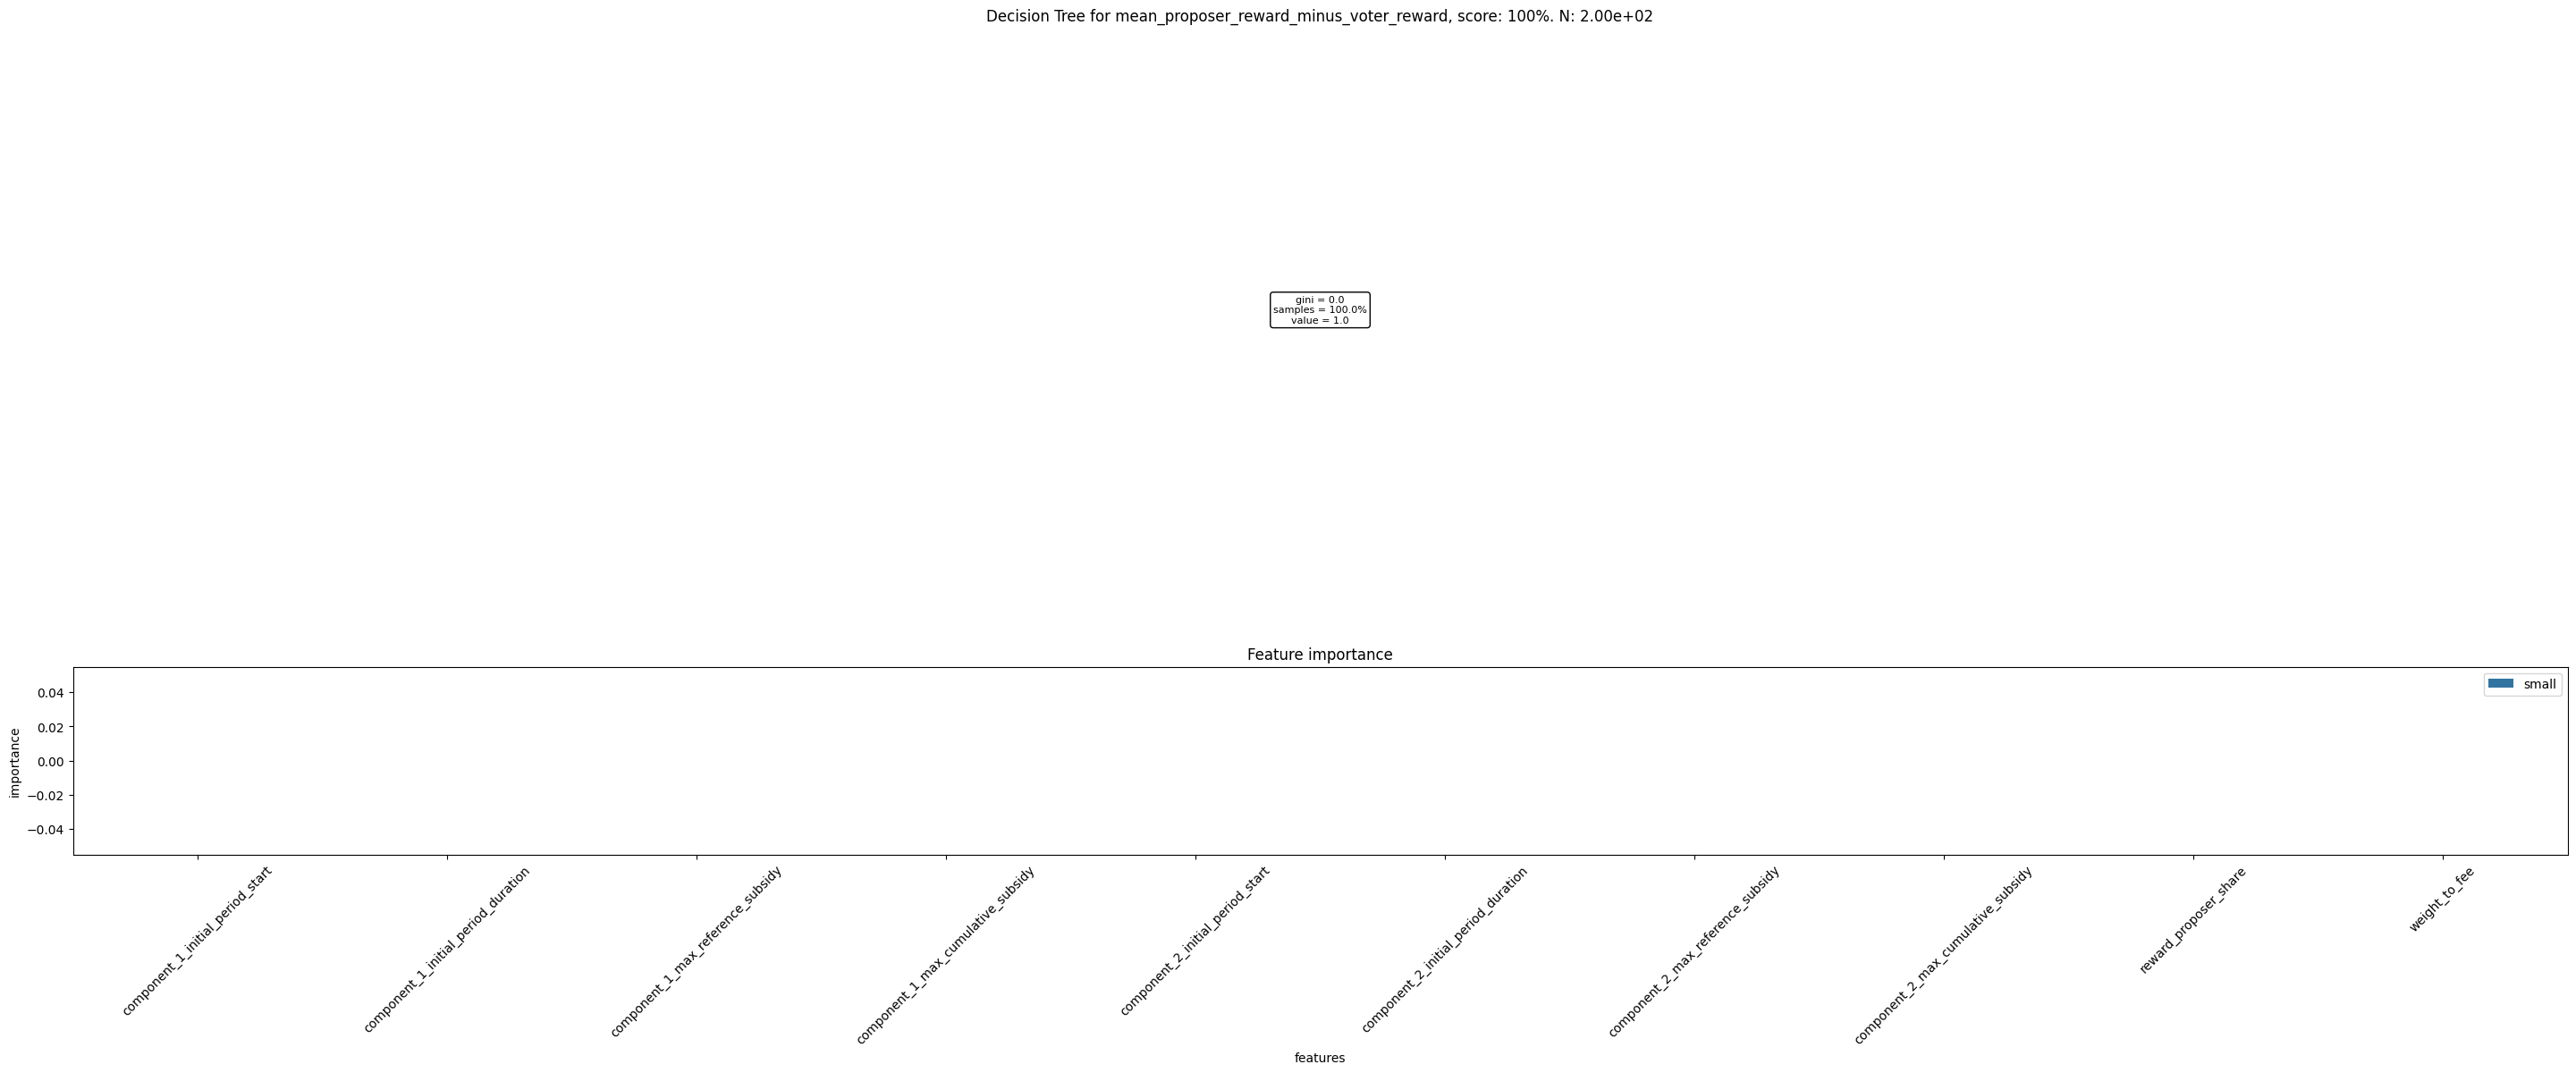

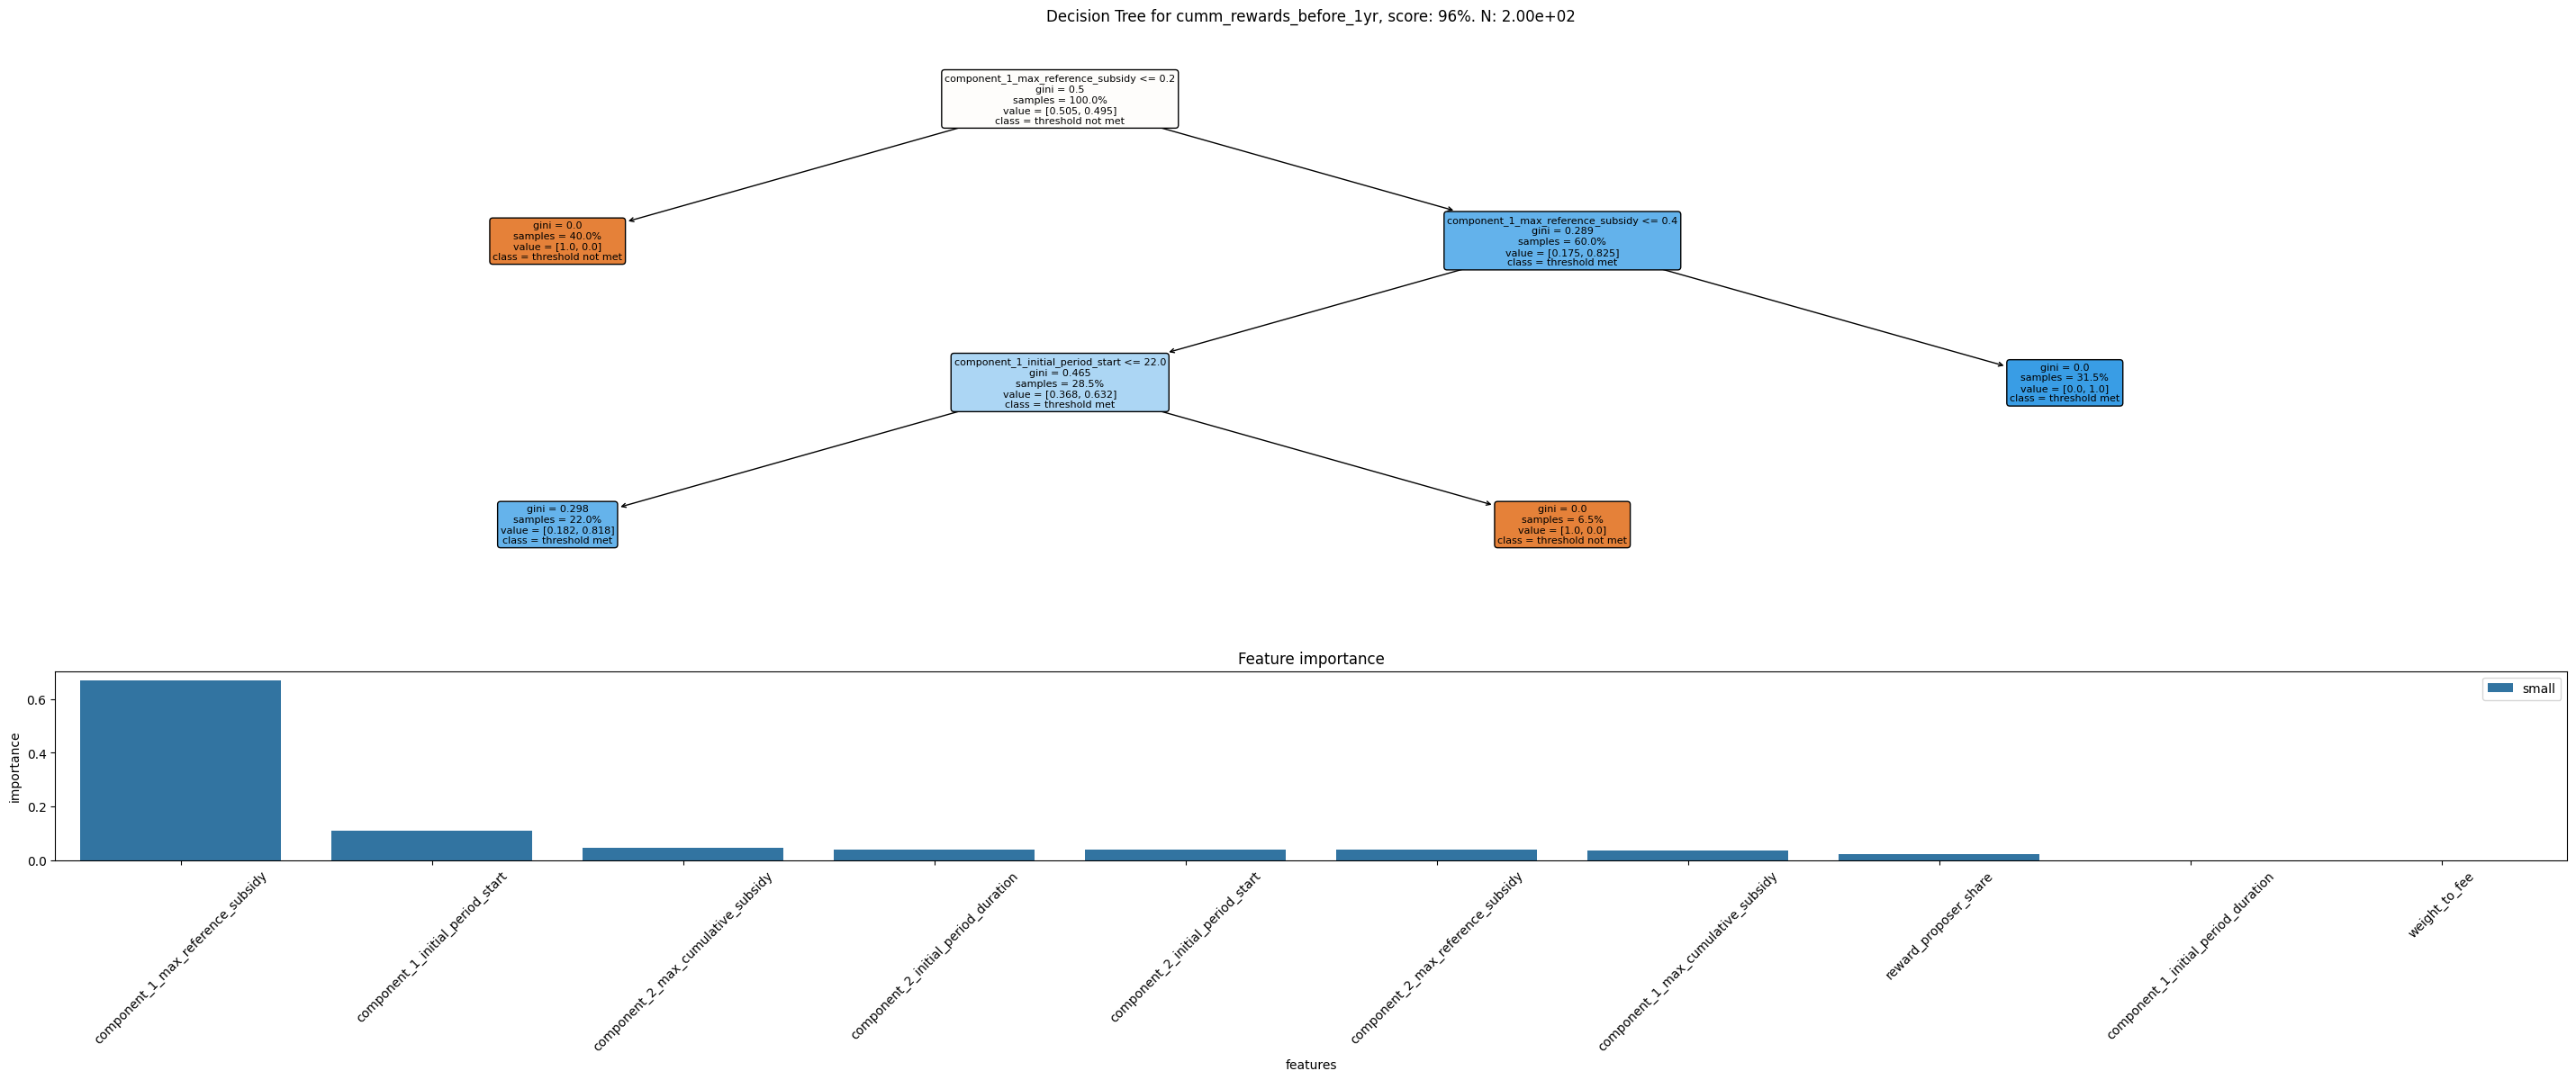

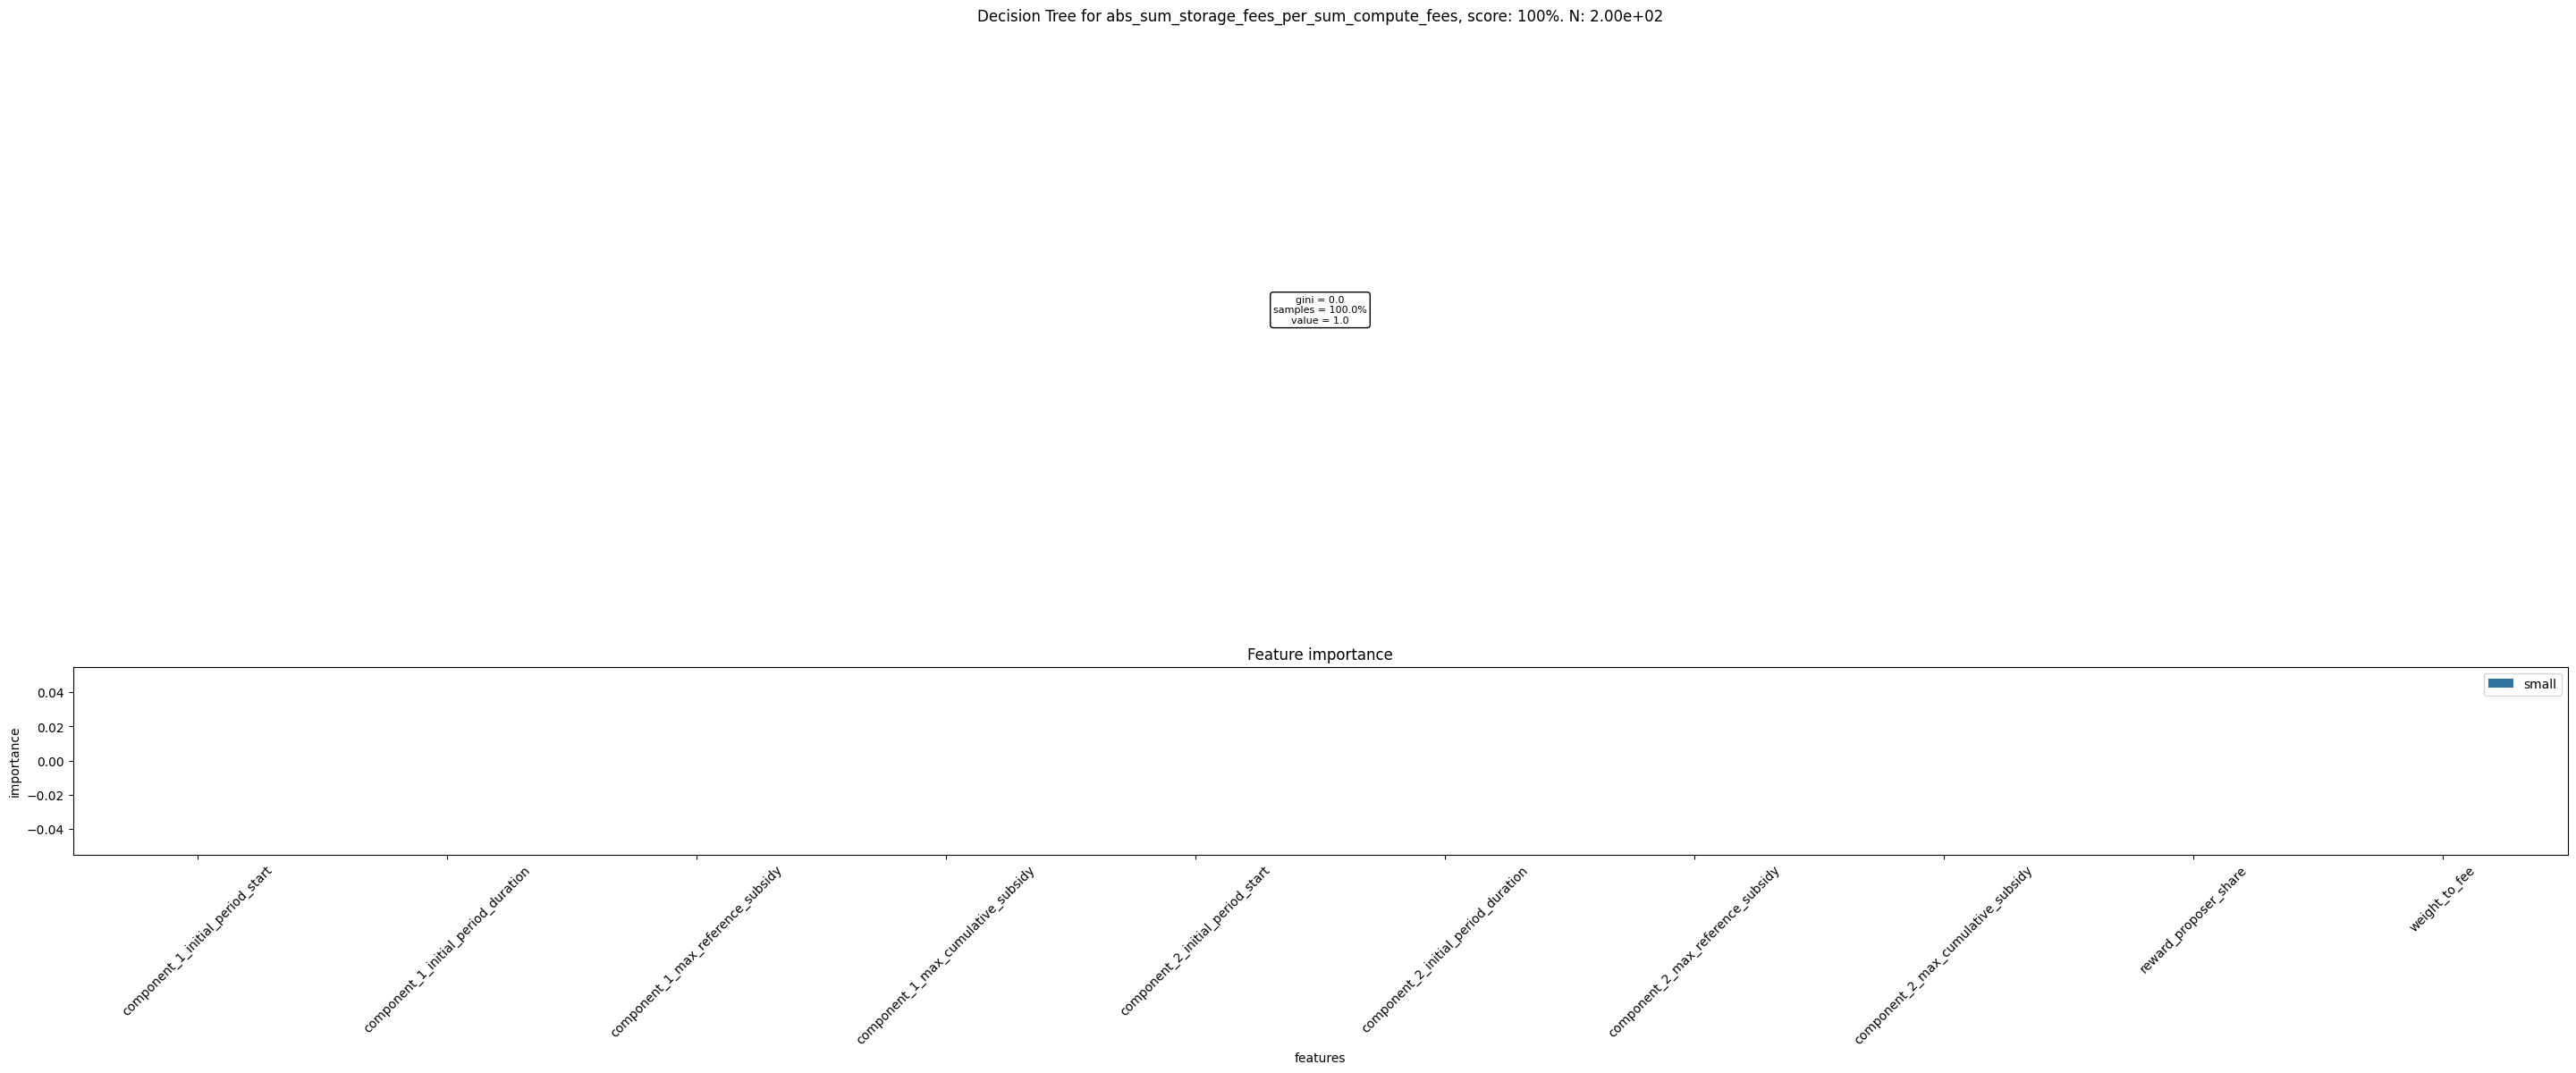

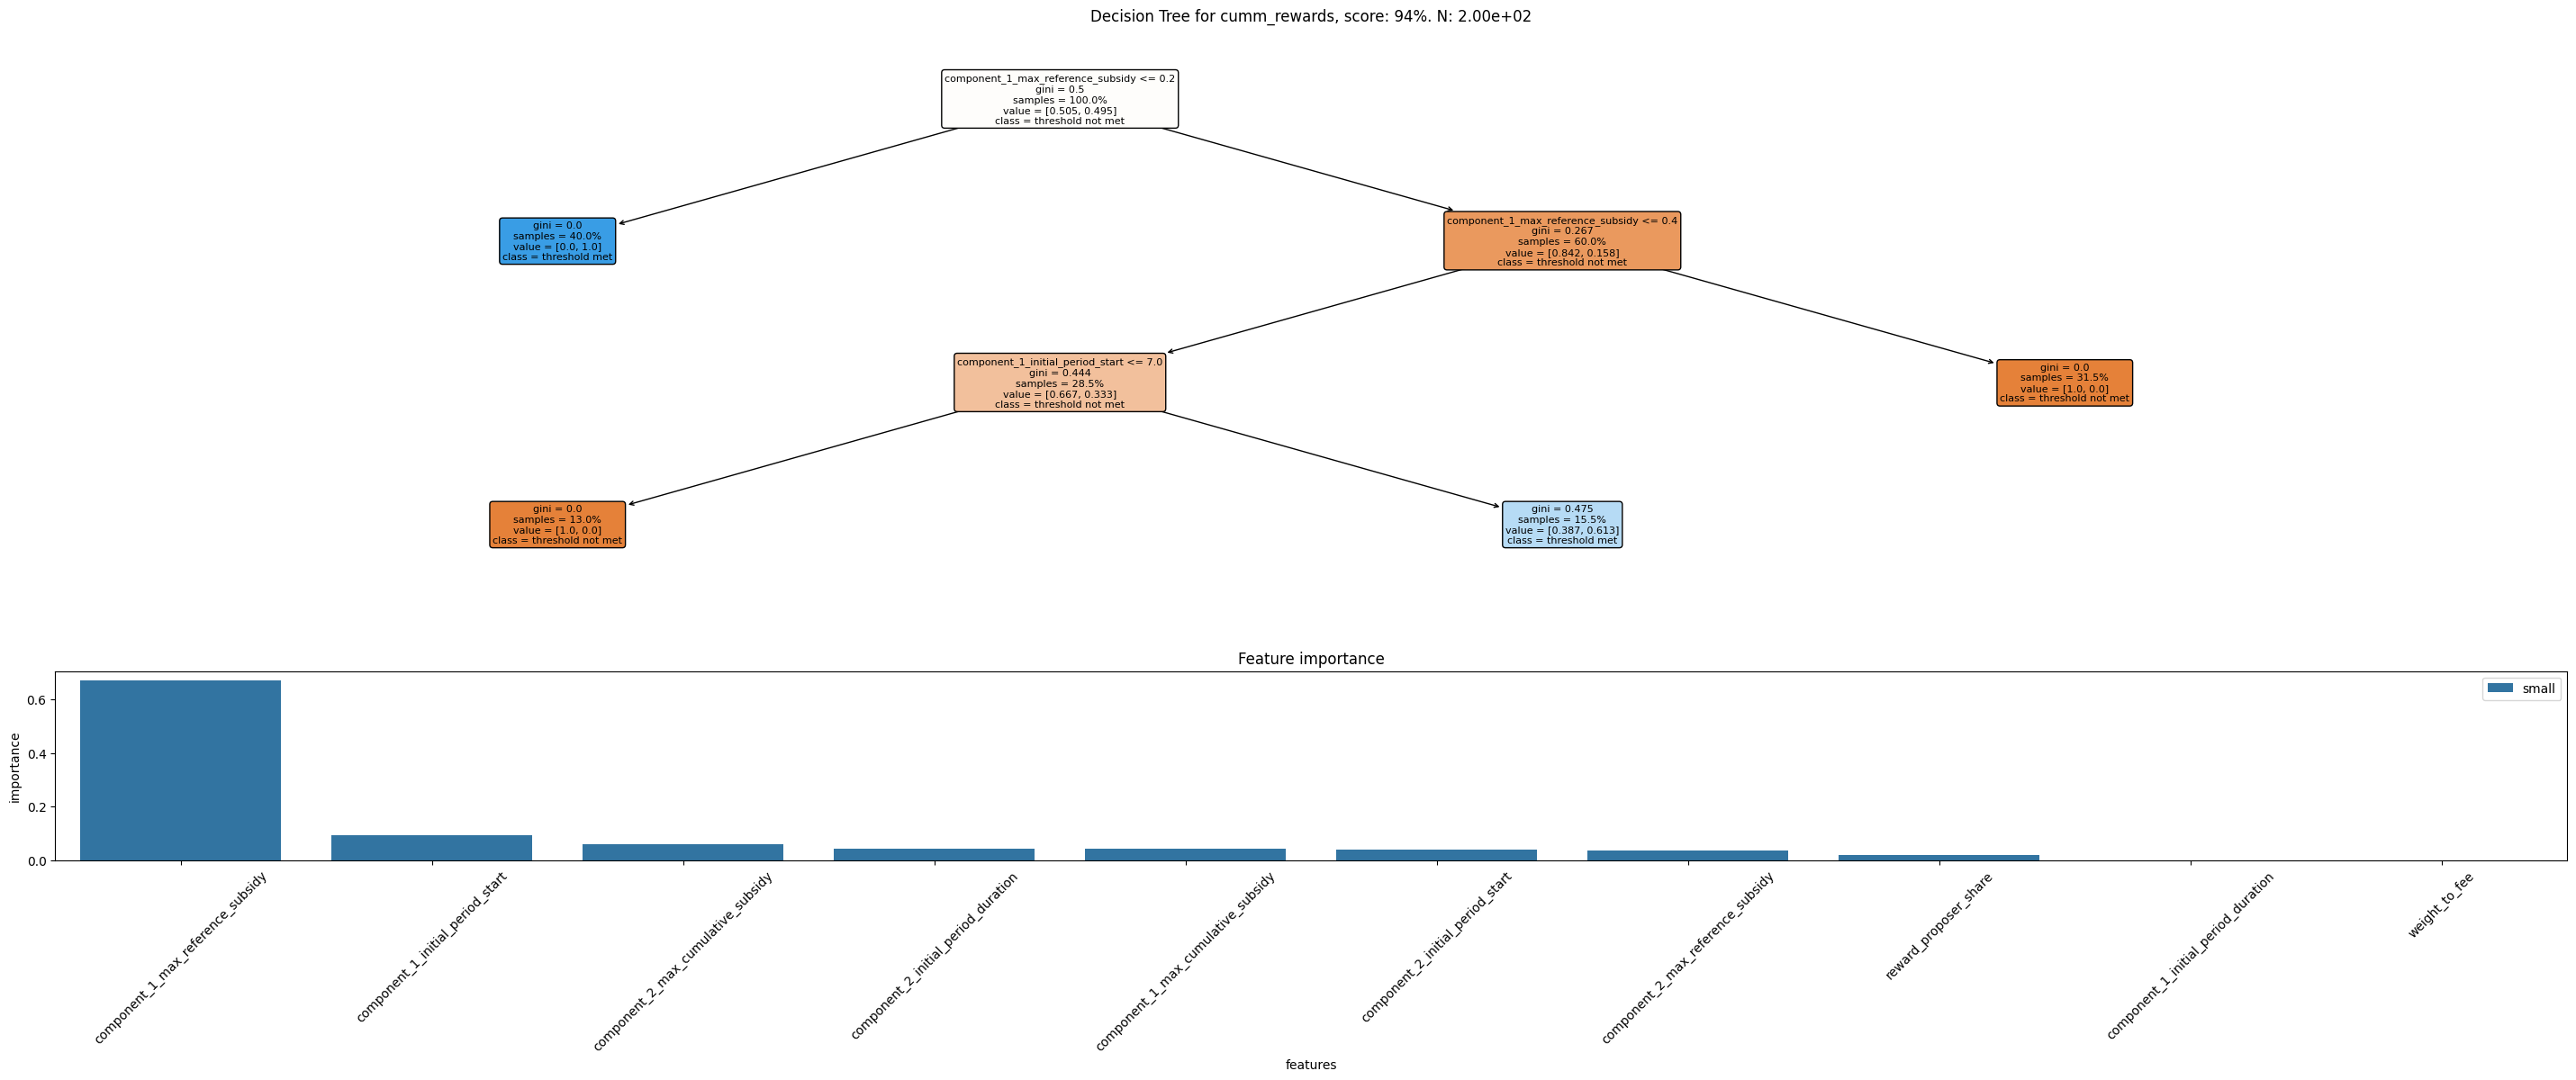

In [4]:
from subspace_model.psuu.plots import create_decision_tree_importances_plot
from subspace_model.psuu.kpis import KPI_functions
import matplotlib.pyplot as plt

col_name = "mean_relative_community_owned_supply"
(kpi_f, kpi_t) = KPI_functions[col_name]

for col_name, (kpi_f, kpi_t) in KPI_functions.items():
    create_decision_tree_importances_plot(agg_df,
                                        col_name =col_name,
                                        success_criteria=kpi_t)
    plt.show()